## Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [3]:
data = pd.read_csv('heart.csv')  

## Data Overview

In [4]:
print("Data Overview:")
print(data.head())
print(data.info())

Data Overview:
   age     sex  cp  trtbps  chol  fbs  restecg  thalach  exng  oldpeak  slp  \
0   63    Male   3     145   233    1        0      150     0      2.3    0   
1   37    Male   2     130   250    0        1      187     0      3.5    0   
2   41  Female   1     130   204    0        0      172     0      1.4    2   
3   56    Male   1     120   236    0        1      178     0      0.8    2   
4   57  Female   0     120   354    0        1      163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    object 
 2   cp       303 non-null    int64  
 3   trtbps   303 non-null    int64  
 4   chol     303 non-null    int

## Descriptive Statistics

In [5]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
              age          cp      trtbps        chol         fbs     restecg  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.966997  131.623762  246.264026    0.148515    0.528053   
std      9.082101    1.032052   17.538143   51.830751    0.356198    0.525860   
min     29.000000    0.000000   94.000000  126.000000    0.000000    0.000000   
25%     47.500000    0.000000  120.000000  211.000000    0.000000    0.000000   
50%     55.000000    1.000000  130.000000  240.000000    0.000000    1.000000   
75%     61.000000    2.000000  140.000000  274.500000    0.000000    1.000000   
max     77.000000    3.000000  200.000000  564.000000    1.000000    2.000000   

          thalach        exng     oldpeak         slp         caa       thall  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   149.646865    0.326733    1.039604    1.399340    0.729373    2.313531   
st

# Data Cleaning

## Check for missing values in each column

In [6]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
age        0
sex        0
cp         0
trtbps     0
chol       0
fbs        0
restecg    0
thalach    0
exng       0
oldpeak    0
slp        0
caa        0
thall      0
output     0
dtype: int64


## Handling Duplicates

In [7]:
duplicate_rows = data[data.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
     age   sex  cp  trtbps  chol  fbs  restecg  thalach  exng  oldpeak  slp  \
164   38  Male   2     138   175    0        1      173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


In [8]:
data = data.drop_duplicates()  # Drop duplicates

## Handling incosistent Data

In [9]:
inconsistent_data = data[(data['age'] <= 0) | (data['trtbps'] <= 0) | (data['chol'] <= 0) | (data['thalach'] <= 0)]
print("\nInconsistent Data:")
print(inconsistent_data)

data = data[~((data['age'] <= 0) | (data['trtbps'] <= 0) | (data['chol'] <= 0) | (data['thalach'] <= 0))]



Inconsistent Data:
Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalach, exng, oldpeak, slp, caa, thall, output]
Index: []


## Handling outliers using Z-Score Method

In [10]:
from scipy.stats import zscore

z_scores = zscore(data[['age', 'trtbps', 'chol', 'thalach']])
outliers = (z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)

print("\nOutliers:")
print(data[outliers])

data = data[~outliers]


Outliers:
     age     sex  cp  trtbps  chol  fbs  restecg  thalach  exng  oldpeak  slp  \
28    65  Female   2     140   417    1        0      157     0      0.8    2   
85    67  Female   2     115   564    0        0      160     0      1.6    1   
220   63  Female   0     150   407    0        0      154     0      4.0    1   
223   56  Female   0     200   288    1        0      133     1      4.0    0   
246   56  Female   0     134   409    0        0      150     1      1.9    1   
248   54    Male   1     192   283    0        0      195     0      0.0    2   
272   67    Male   0     120   237    0        1       71     0      1.0    1   

     caa  thall  output  
28     1      2       1  
85     0      3       1  
220    3      3       0  
223    2      3       0  
246    2      3       0  
248    1      3       0  
272    0      2       0  


## Data Imputation

In [11]:
data.fillna(data.mean(), inplace=True)

## Verifying Cleaned Data

In [12]:
print("\nCleaned Data Overview:")
print(data.head())
print(data.info())


Cleaned Data Overview:
   age     sex  cp  trtbps  chol  fbs  restecg  thalach  exng  oldpeak  slp  \
0   63    Male   3     145   233    1        0      150     0      2.3    0   
1   37    Male   2     130   250    0        1      187     0      3.5    0   
2   41  Female   1     130   204    0        0      172     0      1.4    2   
3   56    Male   1     120   236    0        1      178     0      0.8    2   
4   57  Female   0     120   354    0        1      163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      295 non-null    int64  
 1   sex      295 non-null    object 
 2   cp       295 non-null    int64  
 3   trtbps   295 non-null    int64  
 4   chol     295 non-nu

## Data Visualization

## Scatter Plot of age vs Maximum Heart rate

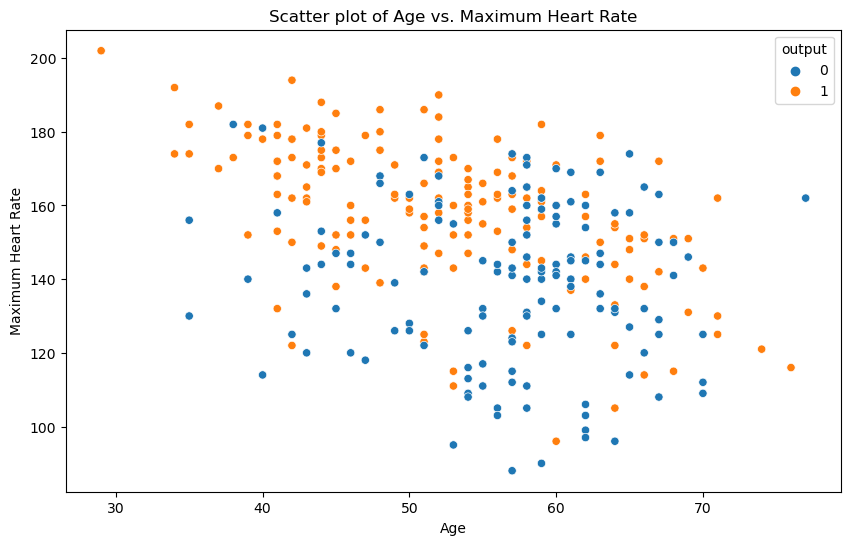

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='output', data=data)
plt.title('Scatter plot of Age vs. Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()


## Histogram of Cholestrol Levels 

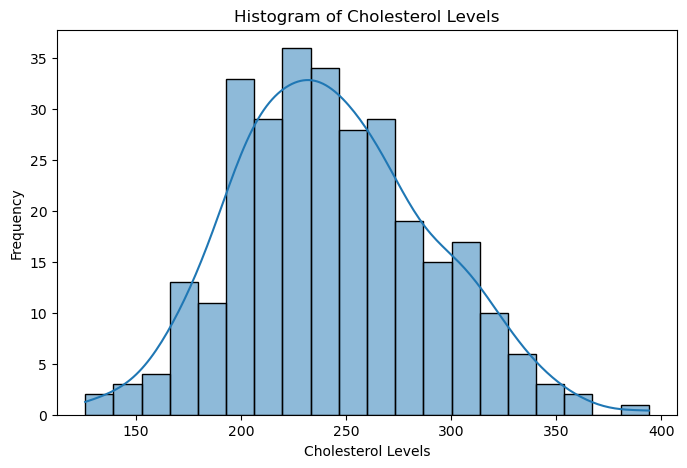

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(data['chol'], bins=20, kde=True)
plt.title('Histogram of Cholesterol Levels')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Frequency')
plt.show()

## Bar plot of Sex vs. Heart Disease Presence 

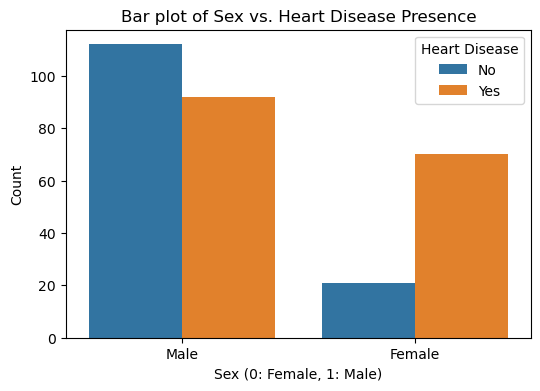

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='output', data=data)
plt.title('Bar plot of Sex vs. Heart Disease Presence')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

## Box Plots for Numeric vs. Categorical Columns

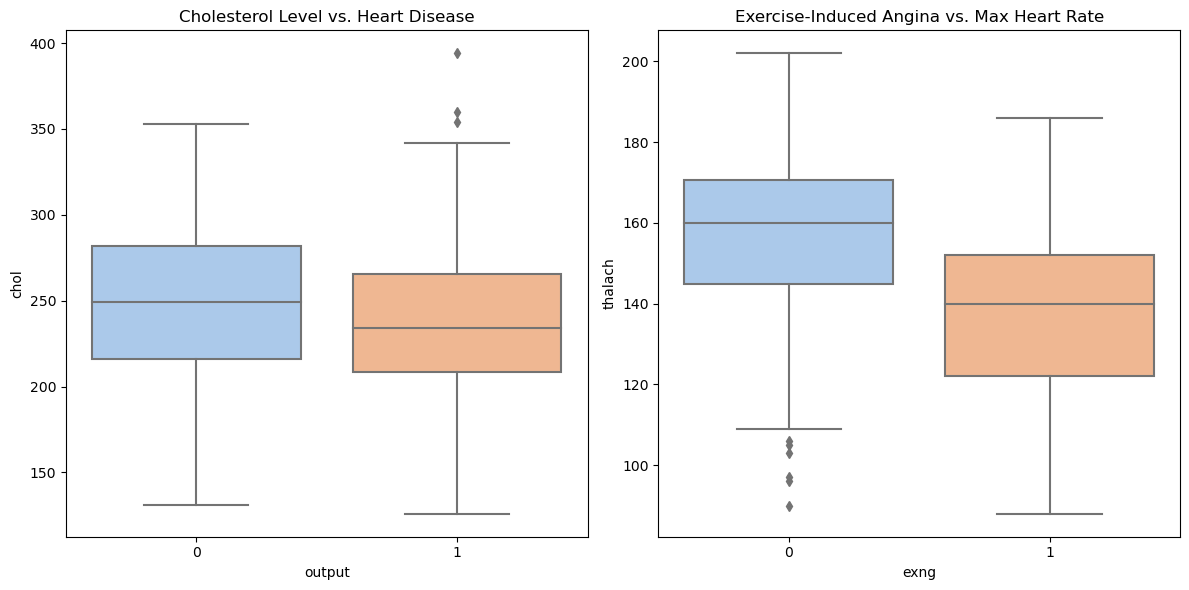

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="output", y="chol", data=data, palette="pastel")
plt.title("Cholesterol Level vs. Heart Disease")

plt.subplot(1, 2, 2)
sns.boxplot(x="exng", y="thalach", data=data, palette="pastel")
plt.title("Exercise-Induced Angina vs. Max Heart Rate")
plt.tight_layout()
plt.show()

## Pairwise Scatter Plot for Numeric Columns

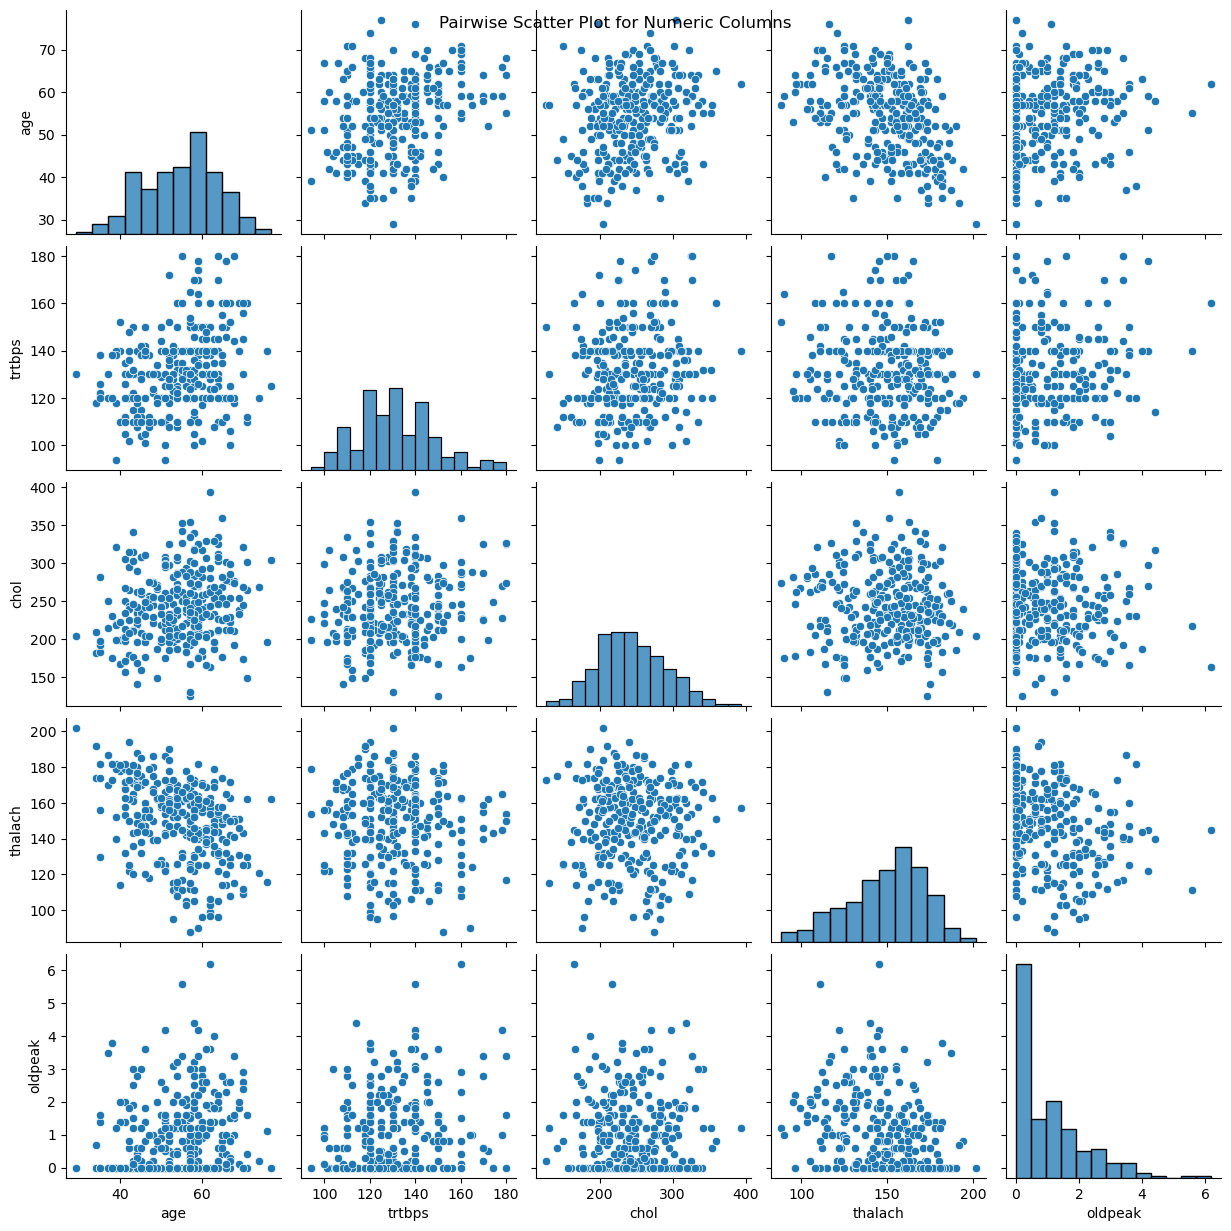

In [32]:
sns.pairplot(data, vars=["age", "trtbps", "chol", "thalach", "oldpeak"])
plt.suptitle("Pairwise Scatter Plot for Numeric Columns")
plt.show()

## Violin Plots for Categorical vs. Numeric Columns

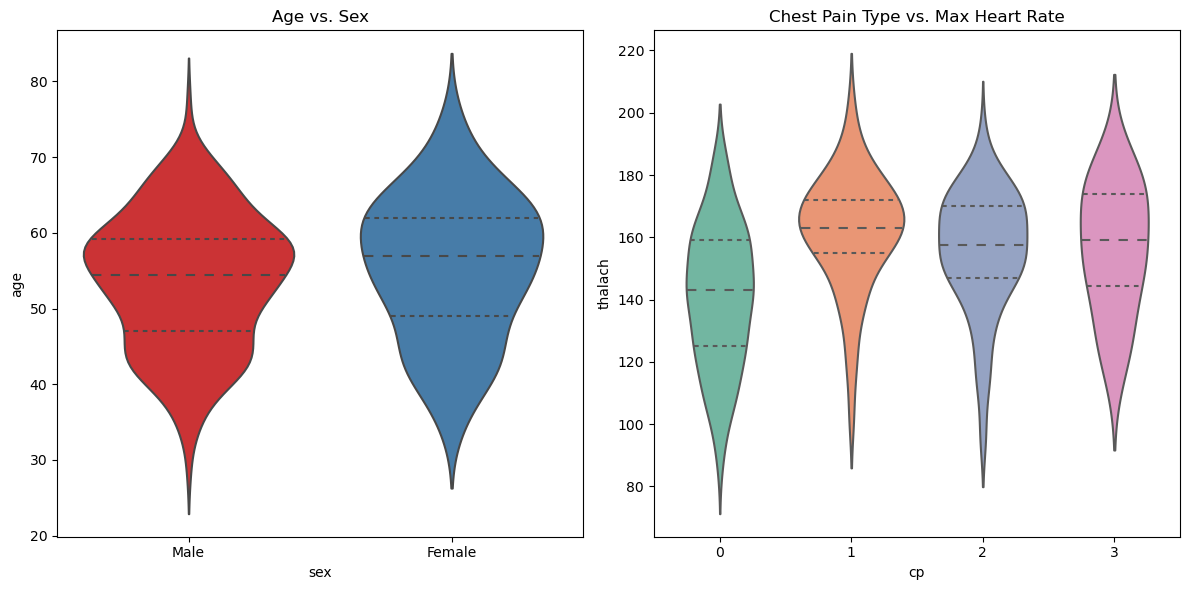

In [33]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x="sex", y="age", data=data, split=True, inner="quart", palette="Set1")
plt.title("Age vs. Sex")

plt.subplot(1, 2, 2)
sns.violinplot(x="cp", y="thalach", data=data, split=True, inner="quart", palette="Set2")
plt.title("Chest Pain Type vs. Max Heart Rate")
plt.tight_layout()
plt.show()


## Correlation Analysis

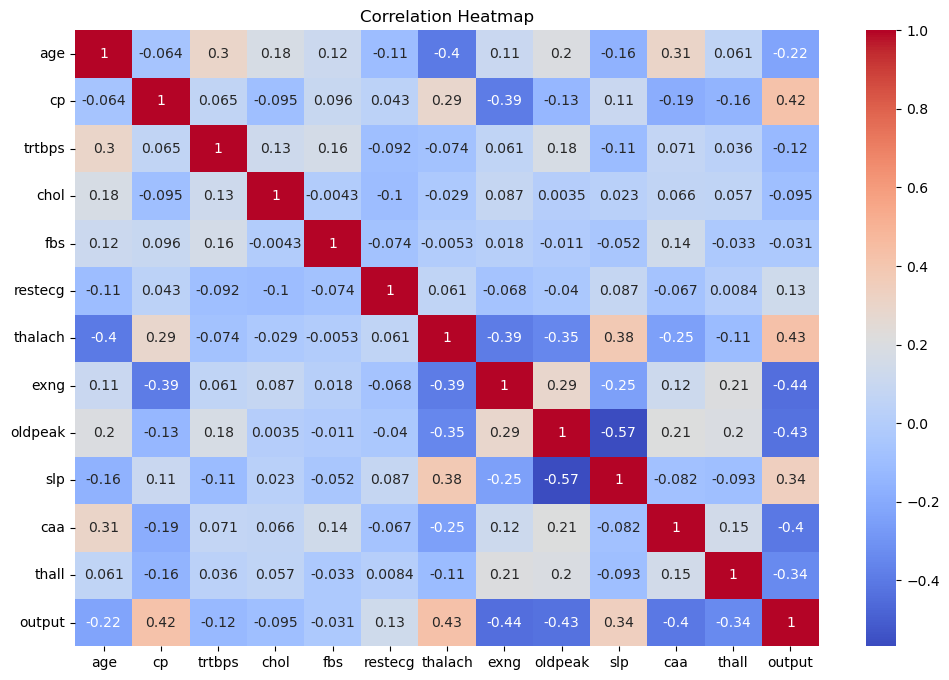

In [16]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Questions On Analysis with Answers


In [17]:
# What is the average age of the patients in the dataset?
average_age = data["age"].mean()
print("1. Average age of the patients:", average_age)

1. Average age of the patients: 54.26101694915254


In [22]:
# How many patients in the dataset are male, and how many are female?
male_count = data[data["sex"] == "Male"]["sex"].count()
female_count = data[data["sex"] == "Female"]["sex"].count()
print("1. Male patients:", male_count)
print("2. Female patients:", female_count)

1. Male patients: 204
2. Female patients: 91


In [25]:
# What is the average resting blood pressure (trestbps) among the patients?
max_blood_pressure = data["trtbps"].max()
min_blood_pressure = data["trtbps"].min()
print("6. Maximum resting blood pressure:", max_blood_pressure)
print("   Minimum resting blood pressure:", min_blood_pressure)

6. Maximum resting blood pressure: 180
   Minimum resting blood pressure: 94


In [26]:
#How many patients have fasting blood sugar level > 120 mg/dl (fbs=1) and <= 120 mg/dl (fbs=0)?
high_fbs_count = data[data["fbs"] == 1]["fbs"].count()
low_fbs_count = data[data["fbs"] == 0]["fbs"].count()
print("5. Patients with high fasting blood sugar (fbs>120 mg/dl):", high_fbs_count)
print("   Patients with low fasting blood sugar (fbs<=120 mg/dl):", low_fbs_count)

5. Patients with high fasting blood sugar (fbs>120 mg/dl): 43
   Patients with low fasting blood sugar (fbs<=120 mg/dl): 252


In [27]:
#What is the average cholesterol level (chol) among the patients?
average_cholesterol = data["chol"].mean()
print("7. Average cholesterol level among the patients:", average_cholesterol)

7. Average cholesterol level among the patients: 243.5186440677966


In [29]:
#How many patients have exercise-induced angina (exang=1) and how many do not (exang=0)?
exang_yes_count = data[data["exng"] == 1]["exng"].count()
exang_no_count = data[data["exng"] == 0]["exng"].count()
print("Patients with exercise-induced angina (exng=1):", exang_yes_count)
print("Patients without exercise-induced angina (exng=0):", exang_no_count)

Patients with exercise-induced angina (exng=1): 97
Patients without exercise-induced angina (exng=0): 198


In [37]:
# What is the maximum heart rate achieved (thalach) among the patients?
max_heart_rate = data["thalach"].max()
print("Maximum heart rate achieved among the patients:", max_heart_rate)


Maximum heart rate achieved among the patients: 202


In [39]:
# How many patients have reversible defect (thal=3), fixed defect (thal=6), and normal defect (thal=7)?
thal_reversible_count = data[data["thall"] == 3]["thall"].count()
thal_fixed_count = data[data["thall"] == 6]["thall"].count()
thal_normal_count = data[data["thall"] == 7]["thall"].count()
print("Patients with reversible defect (thall=3):", thal_reversible_count)
print("Patients with fixed defect (thall=6):", thal_fixed_count)
print("Patients with normal defect (thall=7):", thal_normal_count)

Patients with reversible defect (thall=3): 112
Patients with fixed defect (thall=6): 0
Patients with normal defect (thall=7): 0


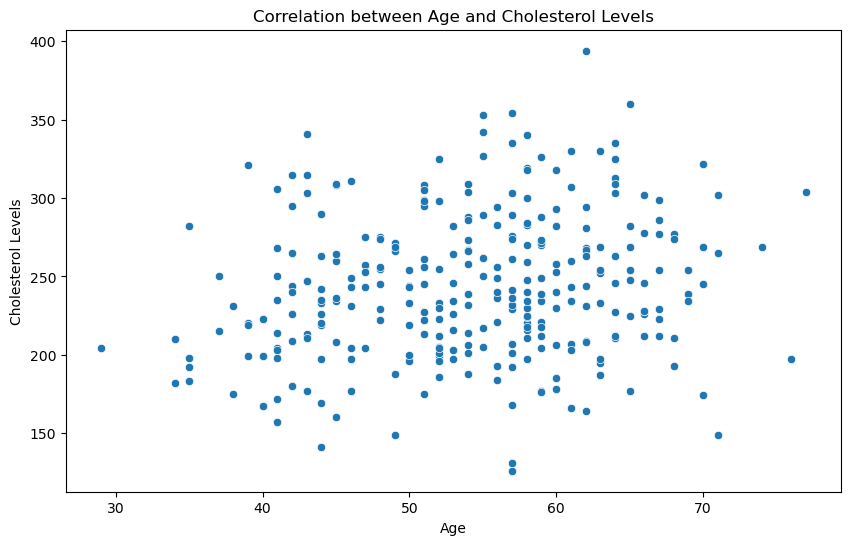

Correlation between age and cholesterol levels: 0.17768758308271124


In [45]:
#How does age correlate with cholesterol levels (chol)?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='chol')
plt.title('Correlation between Age and Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')
plt.show()

age_chol_corr = data['age'].corr(data['chol'])
print("Correlation between age and cholesterol levels:", age_chol_corr)

In [46]:
# Is there a relationship between exercise-induced angina (exang) and resting blood pressure (trestbps)?
exang_trestbps_relation = data.groupby('exng')['trtbps'].mean()
print("Mean resting blood pressure for patients with and without exercise-induced angina:")
print(exang_trestbps_relation)

Mean resting blood pressure for patients with and without exercise-induced angina:
exng
0    130.444444
1    132.628866
Name: trtbps, dtype: float64


In [47]:
# Do individuals with higher fasting blood sugar levels (fbs) tend to have a higher maximum heart rate (thalach)?
fbs_thalach_relation = data.groupby('fbs')['thalach'].mean()
print("Mean maximum heart rate for patients with different fasting blood sugar levels:")
print(fbs_thalach_relation)


Mean maximum heart rate for patients with different fasting blood sugar levels:
fbs
0    149.710317
1    149.372093
Name: thalach, dtype: float64


In [48]:
# What is the distribution of chest pain types (cp) among different age groups?
age_cp_distribution = data.groupby(['age', 'cp']).size().unstack(fill_value=0)
print("Distribution of chest pain types among different age groups:")
print(age_cp_distribution)

Distribution of chest pain types among different age groups:
cp    0  1  2  3
age             
29    0  1  0  0
34    0  1  0  1
35    3  1  0  0
37    0  0  2  0
38    0  0  1  1
39    1  0  3  0
40    2  0  0  1
41    1  6  3  0
42    3  1  3  1
43    6  0  2  0
44    3  3  5  0
45    4  3  0  1
46    3  2  2  0
47    2  0  3  0
48    3  2  2  0
49    1  2  2  0
50    3  1  3  0
51    4  0  7  1
52    5  3  3  2
53    5  0  3  0
54    6  2  7  0
55    5  3  0  0
56    3  4  1  1
57   11  3  3  0
58   10  3  5  1
59    7  1  2  4
60    7  0  3  1
61    6  0  1  1
62    7  2  2  0
63    5  1  1  1
64    5  0  3  2
65    4  0  2  1
66    4  1  1  1
67    5  0  2  0
68    1  0  3  0
69    0  0  1  2
70    2  1  1  0
71    1  1  1  0
74    0  1  0  0
76    0  0  1  0
77    1  0  0  0


In [50]:
# Is there a correlation between the number of major vessels colored by fluoroscopy (ca) and the maximum heart rate (thalach)?
ca_thalach_corr = data['caa'].corr(data['thalach'])
print("Correlation between the number of major vessels (ca) and maximum heart rate (thalach):", ca_thalach_corr)


Correlation between the number of major vessels (ca) and maximum heart rate (thalach): -0.24668033662183128


In [51]:
# Do patients with different chest pain types (cp) exhibit variations in ST depression induced by exercise relative to rest (oldpeak)?
cp_oldpeak_relation = data.groupby('cp')['oldpeak'].mean()
print("Mean ST depression induced by exercise relative to rest for different chest pain types:")
print(cp_oldpeak_relation)

Mean ST depression induced by exercise relative to rest for different chest pain types:
cp
0    1.344604
1    0.322449
2    0.797619
3    1.391304
Name: oldpeak, dtype: float64


In [52]:
# How does the slope of the peak exercise ST segment (slope) relate to cholesterol levels (chol)?
slope_chol_relation = data.groupby('slp')['chol'].mean()
print("Mean cholesterol levels for different slopes of the peak exercise ST segment:")
print(slope_chol_relation)

Mean cholesterol levels for different slopes of the peak exercise ST segment:
slp
0    235.150000
1    244.558824
2    243.705036
Name: chol, dtype: float64


In [54]:
# Is there a correlation between the resting electrocardiographic results (restecg) and the maximum heart rate (thalach)?
restecg_thalach_corr = data['restecg'].corr(data['thalach'])
print("Correlation between resting electrocardiographic results (restecg) and maximum heart rate (thalach):", restecg_thalach_corr)

Correlation between resting electrocardiographic results (restecg) and maximum heart rate (thalach): 0.06128977003559512


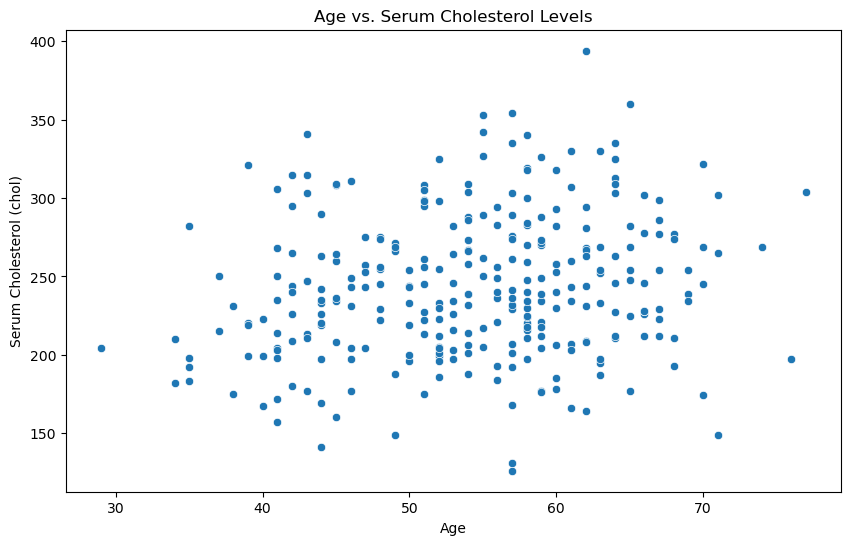

In [55]:
# Scatter plot of Age vs. Serum Cholesterol (chol)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='chol')
plt.title('Age vs. Serum Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Serum Cholesterol (chol)')
plt.show()

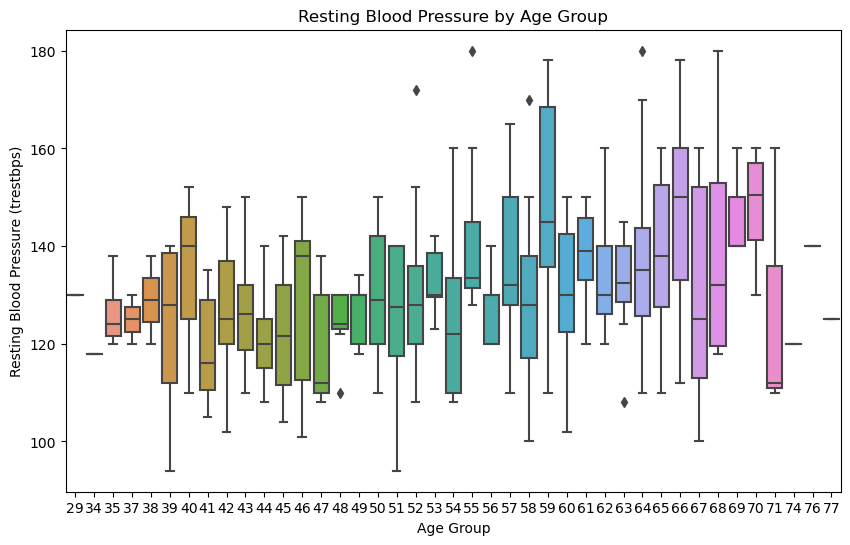

In [56]:
# Box plot of Resting Blood Pressure (trestbps) by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='age', y='trtbps')
plt.title('Resting Blood Pressure by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.show()

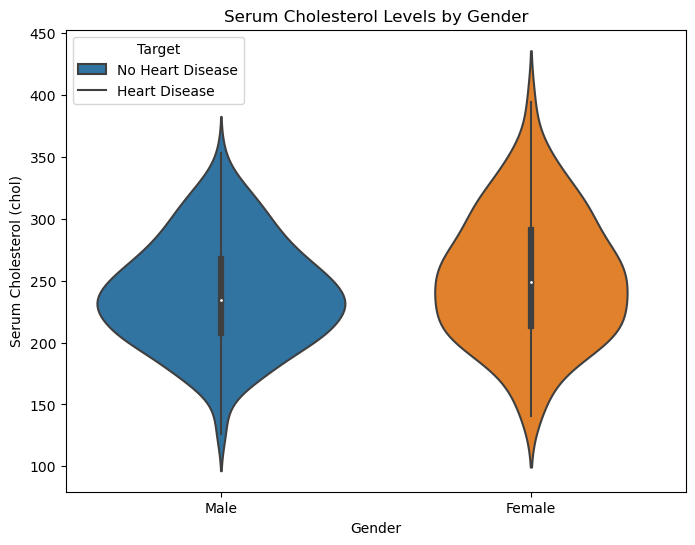

In [60]:
# Violin plot of Serum Cholesterol (chol) by Gender (sex)
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='sex', y='chol', split=True)
plt.title('Serum Cholesterol Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Serum Cholesterol (chol)')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

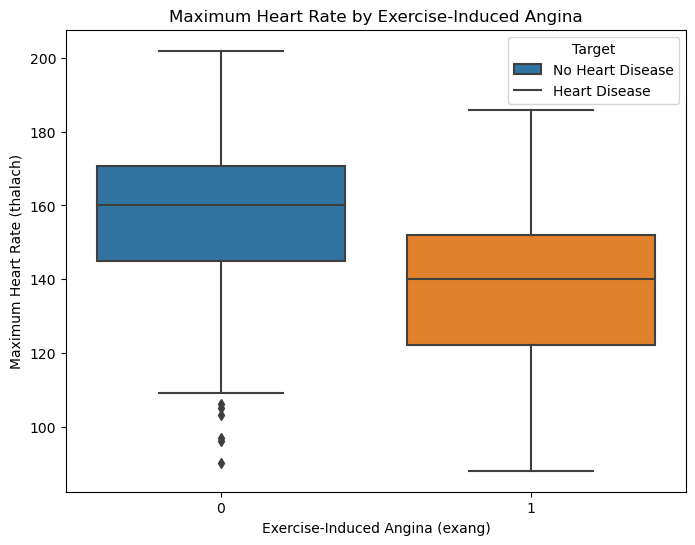

In [61]:
# Box plot of Maximum Heart Rate (thalach) by Exercise-Induced Angina (exang)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='exng', y='thalach')
plt.title('Maximum Heart Rate by Exercise-Induced Angina')
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()